# Notebook de desenvolvimento - Análise de Dados ENEVA
por Diego Prado. Março de 2024.

As células de código deste documento foram desenvolvidas visando a mínima interdependência das mesmas, permitindo a execução individual de cada uma de forma independente. Por este motivo há propositalmente a recorrência das rotinas de importação de bibliotecas, bem como definições repetidas das mesmas variáveis.

## 1) Aquisição e Tratamento - Dados ONS

#### 1.1) Dados 2022 - 2024

Adquire-se os dados do site ONS e cria arquivo 'adb_ONS_2022_2024_mensal.csv' com produção por usina ao longo de {ano}_{mes}.
Tempo esperado para conclusão do processo ~ 1h30.

In [ ]:
#Tratamento dos dados ONS salvos mensalmente (2022-2024)

import pandas as pd
from datetime import datetime

#Setup inicial
anos = ['2022','2023','2024']
meses = ['01','02','03','04','05','06','07','08','09','10','11','12']
ceg_dict = {

    "UTE.GN.MA.030800-5.01": "Maranhão III",

    "UTE.GN.MA.030202-3.01": "Maranhão IV",

    "UTE.GN.MA.030203-1.01": "Maranhão V",

    "UTE.GN.MA.030196-5.01": "Nova Venécia 2",

    "UTE.GN.MA.031193-6.01": "Parnaíba IV",

    "UTE.GN.MA.040562-0.01": "Parnaíba V",

    "UTE.GN.RR.044619-0.01": "Jaguatirica II",

    "UTE.GN.CE.028357-6.01": "Fortaleza",

    "UTE.GN.SE.032228-8.01": "Porto de Sergipe I",

    "UTE.CM.MA.029700-3.01": "Porto do Itaqui",

    "UTE.CM.CE.030098-5.01": "Porto do Pecém II",

}

codigos = list(ceg_dict.keys())

#Criação do Dataframe de saída e de iteração
df = pd.DataFrame(list(codigos), columns=['ceg'])
df.loc[:,'val_geracao'] = 0.0
df.set_index('ceg')

db = pd.DataFrame(list(codigos), columns=['ceg'])

#Automação da aquisição e tratamento dos dados
for ano in anos:
    for mes in meses:
        #Controle
        hora = datetime.now()
        print('Ano: ' + ano + ' / Mês: ' + mes + ' em ' + str(hora))

        if ano == '2024' and mes > '03' :
            #Condição de parada para últimos dados
            continue
        
        #Acesso ao site ONS e aquisição
        url = f'https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/geracao_usina_2_ho/GERACAO_USINA-2_{ano}_{mes}.csv'
        dados = pd.read_csv(url, sep=';')     

        #Filtrando valores com campos de interesse
        dados = dados.loc[dados['ceg'].isin(codigos), ['din_instante', 'nom_usina', 'ceg', 'val_geracao']]

        #Agrupando valores com somatória da geração mensal
        agrupamento = dados[['ceg', 'val_geracao']].groupby('ceg').sum().reset_index()
        df_merged = pd.merge(df,agrupamento, on='ceg', how='outer')
        df['val_geracao'] = df_merged['val_geracao_x'].fillna(0) + df_merged['val_geracao_y'].fillna(0)

        #Salvando Dataframe de iteração (backup)
        nome = f'adb_ONS_{ano}_{mes}.csv'
        df.to_csv(nome, index=True)
        db.loc[:,f'{ano}_{mes}'] = df['val_geracao']
        df.loc[:,'val_geracao'] = 0.0      

#Salvando Dataframe final
nome = f'./db/adb_ONS_2022_2024_mensal.csv'
db.to_csv(nome, index=True)

Adquire-se os dados do site ONS e cria arquivo 'adb_ONS_2022_2024_quarter.csv' com produção por usina ao longo de {ano}_t{quarter}.

In [ ]:
#Tratamento de dados salvos em trimestres (2022-2024)

import pandas as pd
from datetime import datetime

#Setup inicial
anos = ['2022','2023','2024']
meses = ['01','02','03','04','05','06','07','08','09','10','11','12']
ceg_dict = {

    "UTE.GN.MA.030800-5.01": "Maranhão III",

    "UTE.GN.MA.030202-3.01": "Maranhão IV",

    "UTE.GN.MA.030203-1.01": "Maranhão V",

    "UTE.GN.MA.030196-5.01": "Nova Venécia 2",

    "UTE.GN.MA.031193-6.01": "Parnaíba IV",

    "UTE.GN.MA.040562-0.01": "Parnaíba V",

    "UTE.GN.RR.044619-0.01": "Jaguatirica II",

    "UTE.GN.CE.028357-6.01": "Fortaleza",

    "UTE.GN.SE.032228-8.01": "Porto de Sergipe I",

    "UTE.CM.MA.029700-3.01": "Porto do Itaqui",

    "UTE.CM.CE.030098-5.01": "Porto do Pecém II",

}

codigos = list(ceg_dict.keys())

#Criação do Dataframe de saída e de iteração
df = pd.DataFrame(list(codigos), columns=['ceg'])
df.loc[:,'val_geracao'] = 0.0
df.set_index('ceg')

db = pd.DataFrame(list(codigos), columns=['ceg'])

#Automação da aquisição e tratamento dos dados
for ano in anos:
    for mes in meses:
        #Controle
        hora = datetime.now()
        print('Ano: ' + ano + ' / Mês: ' + mes + ' em ' + str(hora))
        
        if ano == '2024' and mes > '03' :
            #Condição de parada para últimos dados
            continue
        
        #Acesso ao site ONS e aquisição
        url = f'https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/geracao_usina_2_ho/GERACAO_USINA-2_{ano}_{mes}.csv'
        dados = pd.read_csv(url, sep=';')     

        #Filtrando valores
        dados = dados.loc[dados['ceg'].isin(codigos), ['din_instante', 'nom_usina', 'ceg', 'val_geracao']]

        #Agrupando valores com somatória da geração trimestral
        agrupamento = dados[['ceg', 'val_geracao']].groupby('ceg').sum().reset_index()
        df_merged = pd.merge(df,agrupamento, on='ceg', how='outer')
        df['val_geracao'] = df_merged['val_geracao_x'].fillna(0) + df_merged['val_geracao_y'].fillna(0)

        if mes in ['03', '06', '09', '12']:
            #Salvando Dataframe de iteração em condições trimestrais
            nome = f'adb_ONS_{ano}_{mes}.csv'
            df.to_csv(nome, index=True)
            db.loc[:,f'{ano}_t{mes}'] = df['val_geracao']
            df.loc[:,'val_geracao'] = 0.0      

#Salvando Dataframe final
nome = f'./db/adb_ONS_2022_2024_quarter.csv'
db.to_csv(nome, index=True)



#### 1.2) Dados 2016 - 2021

Adquire-se os dados do site ONS e cria arquivo 'adb_ONS_2016_2021_mensal.csv' com produção por usina ao longo de {ano}_{mes}.
Tempo esperado para conclusão do processo ~ 3h.

In [ ]:
#Tratamento de dados salvos mensalmente (2016-2021)

import pandas as pd
from datetime import datetime

#Setup inicial
anos = ['2016','2017','2018','2019','2020','2021']
ceg_dict = {

    "UTE.GN.MA.030800-5.01": "Maranhão III",

    "UTE.GN.MA.030202-3.01": "Maranhão IV",

    "UTE.GN.MA.030203-1.01": "Maranhão V",

    "UTE.GN.MA.030196-5.01": "Nova Venécia 2",

    "UTE.GN.MA.031193-6.01": "Parnaíba IV",

    "UTE.GN.MA.040562-0.01": "Parnaíba V",

    "UTE.GN.RR.044619-0.01": "Jaguatirica II",

    "UTE.GN.CE.028357-6.01": "Fortaleza",

    "UTE.GN.SE.032228-8.01": "Porto de Sergipe I",

    "UTE.CM.MA.029700-3.01": "Porto do Itaqui",

    "UTE.CM.CE.030098-5.01": "Porto do Pecém II",

}

codigos = list(ceg_dict.keys())

#Criação do Dataframe de saída
db = pd.DataFrame(list(codigos), columns=['ceg'])

#Automação da aquisição e tratamento dos dados
for ano in anos:
    
    #Controle
    hora = datetime.now()
    print('Ano: ' + ano + ' em ' + str(hora))
    
    #Acesso ao site ONS e aquisição
    url = f'https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/geracao_usina_2_ho/GERACAO_USINA_{ano}.csv'
    colunas_uteis= ['din_instante', 'ceg', 'val_geracao']
    dados = pd.read_csv(url, sep=';', usecols=colunas_uteis)
    

    #Filtrando valores
    print('Filtrando em ' + str(hora))
    dados = dados.loc[dados['ceg'].isin(codigos), ['din_instante', 'ceg', 'val_geracao']]
    dados['din_instante'] = pd.to_datetime(dados['din_instante'])
    dados['mes'] = dados['din_instante'].dt.month.astype(str).str.zfill(2)

    #Agrupando valores com somatória da geração mensal
    pivot_df = pd.pivot_table(dados, values='val_geracao', index=['ceg'], columns=['mes'], aggfunc='sum', fill_value=0)
    pivot_df.columns = [str(ano) + '_' + str(col) for col in pivot_df]
    db = pd.merge(db,pivot_df, on='ceg', how='left').fillna(0.0)

    #Salvando Dataframe de iteração (backup)
    nome = f'adb_ONS_{ano}_backup.csv'
    db.to_csv(nome, index=True)

#Salvando Dataframe final
nome = f'./db/adb_ONS_2016_2021_mensal.csv'
db.to_csv(nome, index=True)
    

#### 1.3) Concatenando arquivos 2016-2024

 A partir dos arquivos 'adb_ONS_2016_2021_mensal.csv' e 'adb_ONS_2022_2024_mensal.csv', cria-se arquivo único  'adb_ONS_2016_2024_mensal.csv' com produção por usina ao longo de {ano}_{mes}.

In [ ]:
#Juntando arquivos .csv para criação de tabela única

import pandas as pd

ceg_dict = {

    "UTE.GN.MA.030800-5.01": "Maranhão III",

    "UTE.GN.MA.030202-3.01": "Maranhão IV",

    "UTE.GN.MA.030203-1.01": "Maranhão V",

    "UTE.GN.MA.030196-5.01": "Nova Venécia 2",

    "UTE.GN.MA.031193-6.01": "Parnaíba IV",

    "UTE.GN.MA.040562-0.01": "Parnaíba V",

    "UTE.GN.RR.044619-0.01": "Jaguatirica II",

    "UTE.GN.CE.028357-6.01": "Fortaleza",

    "UTE.GN.SE.032228-8.01": "Porto de Sergipe I",

    "UTE.CM.MA.029700-3.01": "Porto do Itaqui",

    "UTE.CM.CE.030098-5.01": "Porto do Pecém II",

}

codigos = list(ceg_dict.keys())

#Criação do Dataframe de saída
db = pd.DataFrame(list(codigos), columns=['ceg'])

#Acessando arquivos .csv e adquirindo dados
url_16_21 = './db/adb_ONS_2016_2021_mensal.csv'
url_22_24 = './db/adb_ONS_2022_2024_mensal.csv'
dados_16_21 = pd.read_csv(url_16_21, sep=',').set_index('ceg')
dados_22_24 = pd.read_csv(url_22_24, sep=',').set_index('ceg')
dados_16_21 = dados_16_21.drop(dados_16_21.columns[0], axis=1)
dados_22_24 = dados_22_24.drop(dados_22_24.columns[0], axis=1)

#Formando Dataframe único 2016-2024
db = pd.merge(dados_16_21,dados_22_24, on='ceg')

#Salvando Dataframe único
nome = './db/adb_ONS_2016_2024_mensal.csv'
db.to_csv(nome, index=True)




## 2) Banco de Dados - Alimentação em SQL

### 2.1) Dados ONS
Adiciona dados ONS no Banco de dados a partir do arquivo 'adb_ONS_2016_2024_quarter.csv'.

In [ ]:
#Adicionando dados da ONS na tabela producao_meses (SQL)
import pandas as pd
import sqlite3

#Setup inicial
anos = ['2016','2017','2018','2019','2020','2021','2022','2023','2024']
meses = ['01','02','03','04','05','06','07','08','09','10','11','12']
##(Renomeando de acordo com tags usadas no PowerBi - Calendar)
meses_nome = ['janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
ceg_dict = {

    "UTE.GN.MA.030800-5.01": "Maranhão III",

    "UTE.GN.MA.030202-3.01": "Maranhão IV",

    "UTE.GN.MA.030203-1.01": "Maranhão V",

    "UTE.GN.MA.030196-5.01": "Nova Venécia 2",

    "UTE.GN.MA.031193-6.01": "Parnaíba IV",

    "UTE.GN.MA.040562-0.01": "Parnaíba V",

    "UTE.GN.RR.044619-0.01": "Jaguatirica II",

    "UTE.GN.CE.028357-6.01": "Fortaleza",

    "UTE.GN.SE.032228-8.01": "Porto de Sergipe I",

    "UTE.CM.MA.029700-3.01": "Porto do Itaqui",

    "UTE.CM.CE.030098-5.01": "Porto do Pecém II",

}

#Realizando conexão com DataBase
conexao = sqlite3.connect('.\db\eneva.db')
cursor = conexao.cursor()

#Lendo arquivo .csv
url = './db/adb_ONS_2016_2024_mensal.csv'
dados = pd.read_csv(url, sep=',')
columns = dados.columns

#Inserção de valores na tabela ons_producao_meses
for ano in anos:
    for i, mes in enumerate(meses):
        rotulo = ano + '_' + mes        
        if rotulo in columns:
            for ceg in dados['ceg']:
                comandoSQL = f"""INSERT INTO ons_producao_meses (ceg,mes,ano,val_geracao) VALUES ('{ceg}','{meses_nome[i]}',{ano}, {dados.loc[dados['ceg'] == ceg, rotulo].to_numpy()[0]})"""
                cursor.execute(comandoSQL)
                conexao.commit()
            


Adiciona dados ONS no Banco de dados a partir do arquivo 'adb_ONS_2016_2024_quarter.csv'.

In [ ]:
#Adicionando dados da ONS na tabela ons_producao_quarters (SQL)
import pandas as pd
import numpy as np
import sqlite3

#Setup inicial
anos = ['2016','2017','2018','2019','2020','2021','2022','2023','2024']
meses = ['01','02','03','04','05','06','07','08','09','10','11','12']
##(Renomeando de acordo com tags usadas no PowerBi - Calendar)
meses_nome = ['janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
quarters_name=['Trim 1','Trim 2','Trim 3','Trim 4']
somaTri = np.zeros(11)
ceg_dict = {

    "UTE.GN.MA.030800-5.01": "Maranhão III",

    "UTE.GN.MA.030202-3.01": "Maranhão IV",

    "UTE.GN.MA.030203-1.01": "Maranhão V",

    "UTE.GN.MA.030196-5.01": "Nova Venécia 2",

    "UTE.GN.MA.031193-6.01": "Parnaíba IV",

    "UTE.GN.MA.040562-0.01": "Parnaíba V",

    "UTE.GN.RR.044619-0.01": "Jaguatirica II",

    "UTE.GN.CE.028357-6.01": "Fortaleza",

    "UTE.GN.SE.032228-8.01": "Porto de Sergipe I",

    "UTE.CM.MA.029700-3.01": "Porto do Itaqui",

    "UTE.CM.CE.030098-5.01": "Porto do Pecém II",

}

#Realizando conexão com DataBase
conexao = sqlite3.connect('.\db\eneva.db')
cursor = conexao.cursor()

#Lendo arquivo .csv
url = './db/adb_ONS_2016_2024_mensal.csv'
dados = pd.read_csv(url, sep=',')
columns = dados.columns

#Inserção de valores na tabela ons_producao_meses
for ano in anos:
    for i, mes in enumerate(meses):
        rotulo = ano + '_' + mes        
        if rotulo in columns:
            for u, ceg in enumerate(dados['ceg']):
                somaTri[u] = somaTri[u] + dados.loc[dados['ceg'] == ceg, rotulo].to_numpy()[0]
                if mes in ['03', '06', '09', '12']:
                    comandoSQL = f"""INSERT INTO ons_producao_quarters (ceg,quarter,ano,val_geracao) VALUES ('{ceg}','{quarters_name[int((i+1)/3)-1]}',{ano}, {somaTri[u]})"""
                    #print(comandoSQL)
                    somaTri[u] = 0.0
                    cursor.execute(comandoSQL)
                    conexao.commit()

### 2.2) Dados ENEVA

Adiciona dados ENEVA no Banco de dados a partir do arquivo 'dadosOperacionais.csv' (este foi tratado manualmente).

In [ ]:
#Adicionando dados da ENEVA na tabela eneva_dados (SQL)
import pandas as pd
import sqlite3

#Setup inicial
anos = ['16','17','18','19','20','21','22','23','24']
quarters=['1T','2T','3T','4T']
##Renomeando de acordo com tags usadas no PowerBi - Calendar
quarters_name=['Trim 1','Trim 2','Trim 3','Trim 4']
ceg = ceg_dict = {

    "UTE.GN.MA.030800-5.01": "Maranhão III",

    "UTE.GN.MA.030202-3.01": "Maranhão IV",

    "UTE.GN.MA.030203-1.01": "Maranhão V",

    "UTE.GN.MA.030196-5.01": "Nova Venécia 2",

    "UTE.GN.MA.031193-6.01": "Parnaíba IV",

    "UTE.GN.MA.040562-0.01": "Parnaíba V",

    "UTE.GN.RR.044619-0.01": "Jaguatirica II",

    "UTE.GN.CE.028357-6.01": "Fortaleza",

    "UTE.GN.SE.032228-8.01": "Porto de Sergipe I",

    "UTE.CM.MA.029700-3.01": "Porto do Itaqui",

    "UTE.CM.CE.030098-5.01": "Porto do Pecém II",

}

codigos = list(ceg_dict.keys())
nomes_data = ['Maranhão III','Maranhão IV','Maranhão V','Nova Venécia 2','Parnaíba IV','Parnaíba V','Jaguatirica II','Fortaleza','Porto de Sergipe','Itaqui','Pecém II']

#Realizando conexão com DataBase
conexao = sqlite3.connect('.\db\eneva.db')
cursor = conexao.cursor()

#Lendo arquivo .csv
url = './db/dadosOperacionais.csv'
dados = pd.read_csv(url, sep=';', encoding='latin-1')
columnadb = dados.columns
columns = dados['coluna'].unique()

#Inserção de valores na tabela eneva_dados
for ano in anos:
    for i, quarter in enumerate(quarters):
        rotulo = quarter + ano        
        anov = int(ano) + 2000
        if rotulo in columnadb:
            for nome in nomes_data:
                if nome in dados['nome'].unique().tolist():
                    u = nomes_data.index(nome)
                    ceg = codigos[u]
                    comandoSQL = f"""INSERT INTO eneva_dados (ceg,quarter,ano,disponibilidade,despacho,geracaoLiquida,geracaoBruta,geracaoACR,geracaoACL,receitaVariavelLiquida,cvu) VALUES ('{ceg}', '{quarters_name[i]}', {anov}, {dados.loc[dados['nome'] == nome , rotulo].iloc[0]}, {dados.loc[dados['nome'] == nome , rotulo].iloc[1]}, {dados.loc[dados['nome'] == nome , rotulo].iloc[2]}, {dados.loc[dados['nome'] == nome , rotulo].iloc[3]}, {dados.loc[dados['nome'] == nome , rotulo].iloc[4]}, {dados.loc[dados['nome'] == nome , rotulo].iloc[5]}, {dados.loc[dados['nome'] == nome , rotulo].iloc[6]}, {dados.loc[dados['nome'] == nome , rotulo].iloc[7]})"""
                    comandoSQL = comandoSQL.replace("nan", 'NULL')
                    cursor.execute(comandoSQL)
                    conexao.commit()
                    continue


## 3) Análise dos dados

### 3.1) Cálculo da correlação entre dados ENEVA vs. ONS

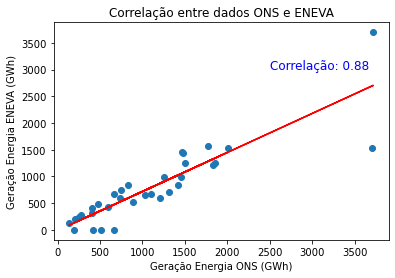

In [4]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Realizando conexão com DataBase
conexao = sqlite3.connect('.\db\eneva.db')

# Extraindo dados ONS
colunas_ons = ['ceg','quarter','ano','val_geracao']
ons_geracao = pd.read_sql_query('SELECT {} FROM ons_producao_quarters'.format(','.join(colunas_ons)), conexao)

# Extraindo dados ENEVA
colunas_eneva = ['ceg','quarter','ano','geracaoBruta']
eneva_geracao = pd.read_sql_query('SELECT {} FROM eneva_dados'.format(','.join(colunas_eneva)), conexao)

conexao.close()

# Função para atribuir a coluna temporal
def calcular_tempo(quarter, ano):
    quarters = ['Trim 1', 'Trim 2', 'Trim 3', 'Trim 4']
    quarter_n = quarters.index(quarter)
    tempo = (ano-2016)*4 + (quarter_n)
    return tempo

# Aplicar a função tempo
ons_geracao['tempo'] = ons_geracao.apply(lambda row: calcular_tempo(row['quarter'], row['ano']), axis=1)
eneva_geracao['tempo'] = eneva_geracao.apply(lambda row: calcular_tempo(row['quarter'], row['ano']), axis=1)

#Criar array de comparação de produção trimestral
ceg_excluidas = ['UTE.GN.MA.030800-5.01', 'UTE.GN.MA.030202-3.01', 'UTE.GN.MA.030203-1.01','UTE.GN.MA.030196-5.01']
soma_producao_ons_eneva = np.zeros((2,33))

for i in range(33):
    soma_producao_ons_eneva[0,i] = ons_geracao.loc[~ons_geracao['ceg'].isin(ceg_excluidas) & (ons_geracao['tempo'] == i), 'val_geracao'].sum()/1000
    soma_producao_ons_eneva[1,i] = eneva_geracao.loc[~eneva_geracao['ceg'].isin(ceg_excluidas) & (eneva_geracao['tempo'] == i), 'geracaoBruta'].sum()

# Calcular a matriz de correlação entre as gerações
matriz_correlacao = np.corrcoef(soma_producao_ons_eneva)
correlacao = matriz_correlacao[0, 1]

# Calcular a linha de regressão linear
m, b = np.polyfit(soma_producao_ons_eneva[0], soma_producao_ons_eneva[1], 1)

# Plotar o gráfico de dispersão e regressão linear
plt.scatter(soma_producao_ons_eneva[0], soma_producao_ons_eneva[1], label='Geração de Energia')
plt.plot(soma_producao_ons_eneva[0], m*soma_producao_ons_eneva[0] + b, color='red', label='Linha de Tendência Linear')
plt.xlabel('Geração Energia ONS (GWh)')
plt.ylabel('Geração Energia ENEVA (GWh)')
plt.title('Correlação entre dados ONS e ENEVA')
plt.text(2500, 3000, f'Correlação: {correlacao:.2f}', fontsize=12, color='blue')
plt.show()






### 3.2) Cálculo da média trimestral ONS

Valores médios : [1772.88 1602.67 3382.71 3549.09]
Desvio padrões  : [213.69 189.69 404.06 391.97]


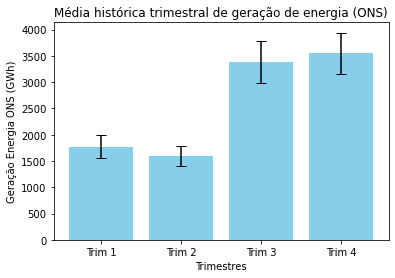

In [17]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Realizando conexão com DataBase
conexao = sqlite3.connect('.\db\eneva.db')

# Extraindo dados ONS
colunas_ons = ['ceg','quarter','ano','val_geracao']
ons_geracao = pd.read_sql_query('SELECT {} FROM ons_producao_quarters'.format(','.join(colunas_ons)), conexao)

conexao.close()

#Criar array de comparação de media e desvio-padrão trimestral
media_stddev_trimestral = np.zeros((2,4))

quarters_name = ['Trim 1', 'Trim 2', 'Trim 3', 'Trim 4']

#Calcular a média e desvio padrão representativos de cada trimestre.
for i in range(4):
    media_stddev_trimestral[0,i] = ons_geracao.loc[(ons_geracao['quarter'] == quarters_name[i]), 'val_geracao'].mean()*11/1000
    media_stddev_trimestral[1,i] = ons_geracao.loc[(ons_geracao['quarter'] == quarters_name[i]), 'val_geracao'].std()/1000
    
print('Valores médios : ' + str(np.round(media_stddev_trimestral[0,:],2)))
print('Desvio padrões  : ' + str(np.round(media_stddev_trimestral[1,:],2)))

# Plotar os valores de média
plt.bar(quarter_name, media_stddev_trimestral[0], yerr=media_stddev_trimestral[1], capsize=5, color='skyblue')
plt.xlabel('Trimestres')
plt.ylabel('Geração Energia ONS (GWh)')
plt.title('Média histórica trimestral de geração de energia (ONS)')
plt.show()


### 3.3) Cálculo de crescimento de geração de energia em um ano (GWh/trimestre)

Valores slopes : [ 212.6   879.33 1217.99 1306.69  348.37 1977.59  489.82  437.34]


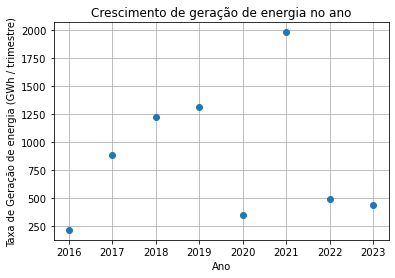

In [15]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Função para calcular tendência linear daquele ano
def slope_to_max(array):
    
    indices_max = np.argmax(array)
    valores_max = array[indices_max]
    slope = (valores_max - array[0]) / indices_max
    
    return slope

#Realizando conexão com DataBase
conexao = sqlite3.connect('.\db\eneva.db')

# Extraindo dados ONS
colunas_ons = ['ceg','quarter','ano','val_geracao']
ons_geracao = pd.read_sql_query('SELECT {} FROM ons_producao_quarters'.format(','.join(colunas_ons)), conexao)

conexao.close()

#Criar array de comparação de 4 medias trimestrais ao longo dos 8 anos
media_trim_ano = np.zeros((4,8))

quarter_name = ['Trim 1', 'Trim 2', 'Trim 3', 'Trim 4']
anos = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

#Calcula a média de cada trimestre ao longo dos anos
for t in range (8):
    for i in range(4):
        filtro = ons_geracao.query(f"quarter == '{quarters_name[i]}' and ano == {anos[t]}")
        media_trim_ano[i,t] = filtro['val_geracao'].mean()*11/1000

#Calcula a taxa de crescimento do respectivo ano
slopes_ano = np.zeros((8))
for u in range (8):
        slopes_ano[u] = slope_to_max(media_trim_ano[:,u])

print('Valores slopes : ' + str(np.round(slopes_ano[:],2)))

# Plotar os valores do slope
plt.plot(anos, slopes_ano, marker='o', linestyle='none')
plt.xlabel('Ano')
plt.ylabel('Taxa de Geração de energia (GWh / trimestre)')
plt.title('Crescimento de geração de energia no ano')
plt.grid(True)
plt.show()

### 3.4) Projeção de geração de energia para próximos trimestres

Geração de energia projetada para os trimestres de 2024
Trim 2 / 2024 = 2631.59 ± 463.11 GWh 
Trim 3 / 2024 = 3490.31 ± 926.22 GWh 
Trim 4 / 2024 = 4349.02 ± 1389.32 GWh 


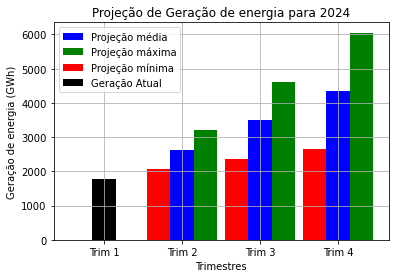

In [16]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Função para calcular tendência linear daquele ano
def slope_to_max(array):
    
    indices_max = np.argmax(array)
    valores_max = array[indices_max]
    slope = (valores_max - array[0]) / indices_max
    
    return slope

#Realizando conexão com DataBase
conexao = sqlite3.connect('.\db\eneva.db')

# Extraindo dados ONS
colunas_ons = ['ceg','quarter','ano','val_geracao']
ons_geracao = pd.read_sql_query('SELECT {} FROM ons_producao_quarters'.format(','.join(colunas_ons)), conexao)

conexao.close()

#Criar array de comparação de 4 medias trimestrais ao longo dos 8 anos
media_trim_ano = np.zeros((4,8))

quarters = np.linspace(0, 3, 4)
quarter_name = ['Trim 1', 'Trim 2', 'Trim 3', 'Trim 4']
anos = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

#Calcula a média de cada trimestre ao longo dos anos
for t in range (8):
    for i in range(4):
        filtro = ons_geracao.query(f"quarter == '{quarter_name[i]}' and ano == {anos[t]}")
        media_trim_ano[i,t] = filtro['val_geracao'].mean()*11/1000

#Calcula a taxa de crescimento do respectivo ano
slopes_ano = np.zeros((8))
for u in range (8):
        slopes_ano[u] = slope_to_max(media_trim_ano[:,u])


#Calcula valores médios, máximos e mínimos de slope para projeção 2024
media_slope_predict = np.mean(slopes_ano)
std_slope_predict = np.std(slopes_ano)

media_slope_predict_pos = media_slope_predict + std_slope_predict
media_slope_predict_neg = media_slope_predict - std_slope_predict

dadoInicial = ons_geracao.loc[(ons_geracao['quarter'] == 'Trim 1'),'val_geracao'].mean()*11/1000

projecao_24 = media_slope_predict*quarters + dadoInicial
projecao_24_pos = media_slope_predict_pos*quarters + dadoInicial
projecao_24_neg = media_slope_predict_neg*quarters + dadoInicial

#Zerando projeções desnecessárias (Trim 1 2024)
projecao_24[0] = 0.0
projecao_24_pos[0] = 0.0
projecao_24_neg[0] = 0.0

#Calculando erro
err2trim = np.std([projecao_24[1],projecao_24_neg[1],projecao_24_pos[1]])
err3trim = np.std([projecao_24[2],projecao_24_neg[2],projecao_24_pos[2]])
err4trim = np.std([projecao_24[3],projecao_24_neg[3],projecao_24_pos[3]])

print('Geração de energia projetada para os trimestres de 2024')
print('Trim 2 / 2024 = ' + str(round(projecao_24[1],2)) + ' ± ' + str(round(err2trim,2)) + ' GWh ')
print('Trim 3 / 2024 = ' + str(round(projecao_24[2],2)) + ' ± ' + str(round(err3trim,2)) + ' GWh ')
print('Trim 4 / 2024 = ' + str(round(projecao_24[3],2)) + ' ± ' + str(round(err4trim,2)) + ' GWh ')

# Plotando projeções
largura_barra = 0.3
plt.bar(quarters, projecao_24, width=largura_barra, label='Projeção média', color='blue')
plt.bar(quarters + largura_barra, projecao_24_pos, width=largura_barra, label='Projeção máxima', linestyle='--', color='green')
plt.bar(quarters - largura_barra, projecao_24_neg, width=largura_barra, label='Projeção mínima', linestyle='--', color='red')
plt.bar(0, dadoInicial, width=largura_barra, color='black', label='Geração Atual')
plt.legend()
plt.xlabel('Trimestres')
plt.ylabel('Geração de energia (GWh)')
plt.title('Projeção de Geração de energia para 2024')
plt.xticks(quarters, quarter_name)

# Exibir o gráfico
plt.grid(True)
plt.show()


